In [1]:
## 在asthma性状上的鲁棒性测试

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix' # 设置数学公式字体为stix
plt.rcParams['font.size'] = 11  # 设置全局字体大小
plt.rcParams['text.usetex'] = False  # 开启 LaTeX 渲染

import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\00_CeSOP\\plot\\figures\\13.png'

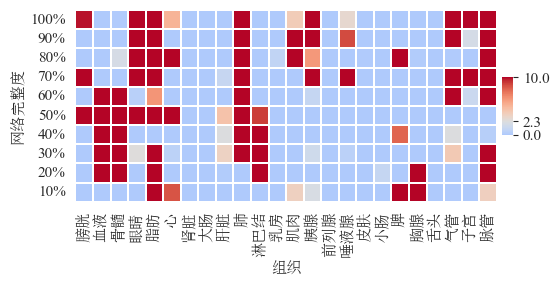

In [19]:
'''网络完整性'''
import math

result = pd.DataFrame()
for percent in range(10,100,10):
    results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent%s\tissue_top10_trait29_core_lcczscore.csv"%percent)   
    result = pd.concat([result,results_ct["fisher's pvalue"]],axis=1)
results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent90\tissue_top10_trait29_core_lcczscore.csv")    
result.index = results_ct["tissue"]

data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
data.index = data["tissue"]
fisher_df_01 = pd.concat([result,data["fisher's pvalue"]],axis=1)   
fisher_df_01.columns = [f"{i}%" for i in range(10, 101, 10)]

# 使用 seaborn 绘制热图
import seaborn as sns
epsilon = 1e-10
result = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\all.csv",index_col=0)

result_log = -np.log10(fisher_df_01+epsilon)
## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
result_log.index=names["name"]

plt.rcParams['font.size'] = 11
plt.figure(figsize=(6, 3))  # 设置图形大小
x = -np.log10(0.005 + epsilon)
df=result_log[result_log.columns[::-1]].T
ax = sns.heatmap(df, cmap='coolwarm', linewidths = 0.05, 
                center = x,
                 cbar_kws={'shrink': 0.3, 'aspect': 5, 'ticks': [0, x, 10], 'location': 'right',
                           "pad": 0.01
                           # 'label':'GS'
                           }
                )
# **强制显示所有标签**
ax.set_xticks(np.arange(len(df.columns)) + 0.5)  # 设定 X 轴刻度
ax.set_yticks(np.arange(len(df.index)) + 0.5)   # 设定 Y 轴刻度
ax.set_xticklabels(df.columns, rotation=90)  # 旋转并对齐 X 轴标签
ax.set_yticklabels(df.index, rotation=0)    # 旋转 Y 轴标签


# 设置图表标题和标签
ax.set_xlabel('组织')  # 纵轴标签
ax.set_ylabel('网络完整度')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\13.png",dpi=1000)
plt.show()


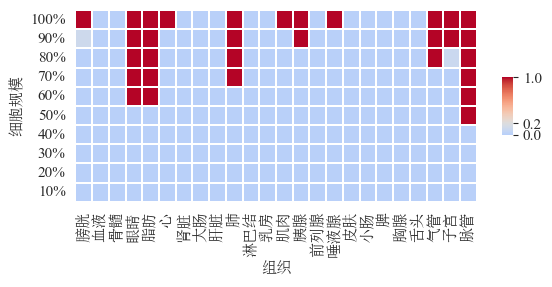

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap
epsilon = 1e-10
result = pd.read_csv(r"E:\00_CeSOP\results\robust\cell percent\all.csv",index_col=0)
# result_log = -np.log10(result+epsilon)
result.columns = [f"{i}%" for i in range(10, 101, 10)]

## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
result.index=names["name"]

plt.rcParams['font.size'] = 11
plt.figure(figsize=(6, 3))  # 设置图形大小
df = result[result.columns[::-1]].T
# x = -np.log10(0.005 + epsilon)
ax = sns.heatmap(df, cmap='coolwarm', linewidths = 0.05, 
                center = 0.2,
                cbar_kws={
                # 'orientation': 'horizontal',  # 色条的方向为水平
                'shrink': 0.3,                # 色条缩小为 80%
                'aspect': 5,                 # 色条的长宽比
                # 'label': 'Value',             # 色条标签
                'ticks': [0,0.2,1]           # 设置色条的刻度
            }
                )
# **强制显示所有标签**
ax.set_xticks(np.arange(len(df.columns)) + 0.5)  # 设定 X 轴刻度
ax.set_yticks(np.arange(len(df.index)) + 0.5)   # 设定 Y 轴刻度
ax.set_xticklabels(df.columns, rotation=90)  # 旋转并对齐 X 轴标签
ax.set_yticklabels(df.index, rotation=0)    # 旋转 Y 轴标签
# 设置图表标题和标签
ax.set_xlabel('组织')  # 纵轴标签
ax.set_ylabel('细胞规模')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\14.png",dpi=1000)
plt.show()

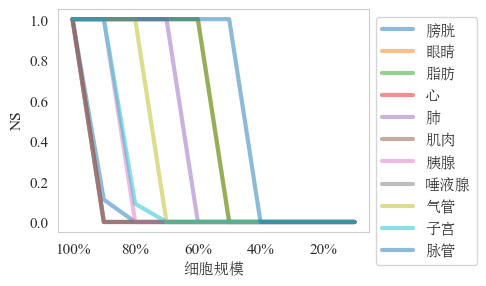

In [72]:
plt.show()
data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(data[data["fisher's pvalue"] < 0.005]["tissue"])
result = pd.read_csv(r"E:\00_CeSOP\results\robust\cell percent\all.csv", index_col=0)
result_filtered_df = result[result.index.isin(filtered_list)]
result_filtered_df.columns = [f"{i}%" for i in range(10, 101, 10)]
result_filtered_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']

#战置全局字体大小为12
plt.rcParams['font.size'] = 11
# plt.figure(figsize=(2, 1))
ax = result_filtered_df[result_filtered_df.columns[::-1]].T.plot(linestyle='-', linewidth=3, alpha=0.5, ylabel="NS",
                                                                 xlabel="细胞规模",figsize=(5, 3))
plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\16.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

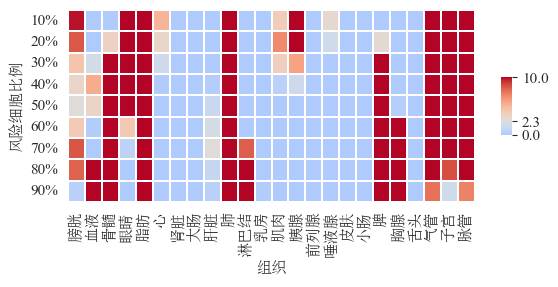

In [87]:
## 性状显著相关的组织or细胞类型数量
epsilon = 1e-10
trait = 29
core = "core"
fisher_df = pd.DataFrame()
for per in range(10,100,10):
    df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(per,trait,core))
    df["log fisher's pvalue"] = -np.log10(df["fisher's pvalue"] + epsilon)
    fisher_df = pd.concat([fisher_df,df["log fisher's pvalue"]],axis=1)
    
df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(10,trait,core))    
fisher_df.columns = [f"{i}%" for i in range(10, 100, 10)]
fisher_df.index = df["tissue"]## 使用组织的中文名称

names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
fisher_df.index=names["name"]

plt.figure(figsize=(6, 3))  # 设置图形大小
x = -np.log10(0.005 + epsilon)
df= fisher_df.T
ax = sns.heatmap(df, cmap='coolwarm', linewidths = 0.05, 
                center = -np.log10(0.005 + epsilon),
                cbar_kws={
                # 'orientation': 'horizontal',  # 色条的方向为水平
                'shrink': 0.3,                # 色条缩小为 80%
                'aspect': 5,                 # 色条的长宽比
                # 'label': 'Value',             # 色条标签
                'ticks': [0, -np.log10(0.005 + epsilon), 10]           # 设置色条的刻度
            }
                )
# **强制显示所有标签**
ax.set_xticks(np.arange(len(df.columns)) + 0.5)  # 设定 X 轴刻度
ax.set_yticks(np.arange(len(df.index)) + 0.5)   # 设定 Y 轴刻度
ax.set_xticklabels(df.columns, rotation=90)  # 旋转并对齐 X 轴标签
ax.set_yticklabels(df.index, rotation=0)    # 旋转 Y 轴标签
# 设置图表标题和标签
ax.set_xlabel('组织')  # 纵轴标签
ax.set_ylabel('风险细胞比例')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\15.png",dpi=1000)
plt.show()

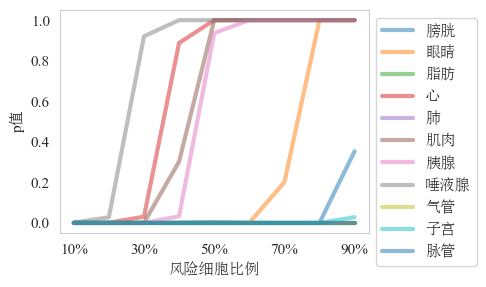

In [88]:
df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(10,trait,core),index_col=0) 
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(df[df["fisher's pvalue"] < 0.005]["tissue"])
fisher_df = pd.DataFrame()
for per in range(10,100,10):
    df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(per,trait,core))
    # 筛选 col1 列的值在 value_list 中的行
    filtered_df = df[df['tissue'].isin(filtered_list)]
    fisher_df = pd.concat([fisher_df,filtered_df["fisher's pvalue"]],axis=1)
fisher_df.index = filtered_list
# fisher_df.columns = [f"TOP{i}" for i in range(10, 100, 10)]
fisher_df.columns = [f"{i}%" for i in range(10, 100, 10)]
fisher_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']
ax = fisher_df.T.plot(linestyle='-', linewidth=3,alpha=0.5,ylabel="",xlabel = "风险细胞比例",figsize=(5, 3))
# 设置 y 轴标签
# ax.set_ylabel(r"$-\log_{10}$(p)")
ax.set_ylabel(r"p值")
# 显示图形
# 设置图例在图表外部
# 添加横线
# plt.axhline(y=0.005, color='red', linestyle='--')
# # 添加竖线
# plt.axvline(x=4, color='blue', linestyle='--')

plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\17.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

In [ ]:
plt.show()
data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(data[data["fisher's pvalue"] < 0.005]["tissue"])
result = pd.read_csv(r"E:\00_CeSOP\results\robust\cell percent\all.csv", index_col=0)
result_filtered_df = result[result.index.isin(filtered_list)]
result_filtered_df.columns = [f"{i}%" for i in range(10, 101, 10)]
result_filtered_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']

#战置全局字体大小为12
plt.rcParams['font.size'] = 12
# plt.figure(figsize=(2, 1))
ax = result_filtered_df[result_filtered_df.columns[::-1]].T.plot(linestyle='-', linewidth=3, alpha=0.5, ylabel="NS",
                                                                 xlabel="细胞规模",figsize=(4, 2))
plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\16.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

In [ ]:
df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(10,trait,core),index_col=0) 
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(df[df["fisher's pvalue"] < 0.005]["tissue"])
fisher_df = pd.DataFrame()
for per in range(10,100,10):
    df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(per,trait,core))
    # 筛选 col1 列的值在 value_list 中的行
    filtered_df = df[df['tissue'].isin(filtered_list)]
    fisher_df = pd.concat([fisher_df,filtered_df["fisher's pvalue"]],axis=1)
fisher_df.index = filtered_list
# fisher_df.columns = [f"TOP{i}" for i in range(10, 100, 10)]
fisher_df.columns = [f"{i}%" for i in range(10, 100, 10)]
fisher_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']
ax = fisher_df.T.plot(linestyle='-', linewidth=3,alpha=0.5,ylabel="",xlabel = "风险细胞比例",figsize=(5, 3))
# 设置 y 轴标签
# ax.set_ylabel(r"$-\log_{10}$(p)")
ax.set_ylabel(r"p值")
# 显示图形
# 设置图例在图表外部
# 添加横线
# plt.axhline(y=0.005, color='red', linestyle='--')
# # 添加竖线
# plt.axvline(x=4, color='blue', linestyle='--')

plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures\17.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

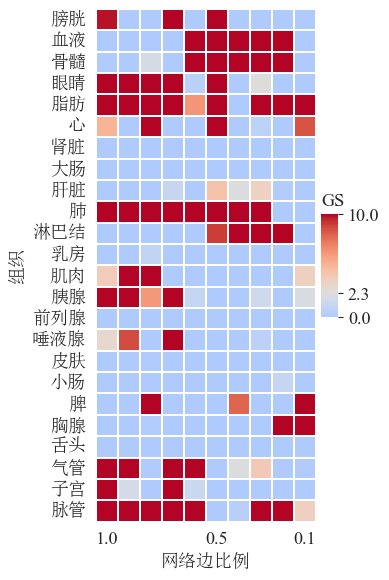

In [53]:
'''网络完整性'''
import math
from matplotlib.ticker import FuncFormatter
# plt.rcParams['text.usetex'] = True  # 开启 LaTeX 渲染

result = pd.DataFrame()
for percent in range(10,100,10):
    results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent%s\tissue_top10_trait29_core_lcczscore.csv"%percent)   
    result = pd.concat([result,results_ct["fisher's pvalue"]],axis=1)
results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent90\tissue_top10_trait29_core_lcczscore.csv")    
result.index = results_ct["tissue"]

data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
data.index = data["tissue"]
fisher_df_01 = pd.concat([result,data["fisher's pvalue"]],axis=1)   
# fisher_df_01.columns = [f"{i}%" for i in range(10, 101, 10)]
fisher_df_01.columns = [i*0.1 for i in range(1, 11)]

# 使用 seaborn 绘制热图
import seaborn as sns
epsilon = 1e-10
result = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\all.csv",index_col=0)

result_log = -np.log10(fisher_df_01+epsilon)
## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
result_log.index=names["name"]

plt.rcParams['font.size'] = 13
plt.figure(figsize=(4, 6))  # 设置图形大小
x = -np.log10(0.005 + epsilon)
# 翻转列顺序
df = result_log[result_log.columns[::-1]]

# 绘制热图
ax = sns.heatmap(
    df, 
    cmap='coolwarm', 
    linewidths=0.2, 
    center=x,
    cbar_kws={
        'shrink': 0.2, 
        'aspect': 6, 
        'ticks': [0, x, 10], 
        'location': 'right',
        'pad': 0.02
    }
)

# 取列数
num_cols = len(df.columns)

# 设置 xticks 偏移 (注意每个都+0.5)
ax.set_xticks([0.5, int(num_cols / 2) + 0.5, num_cols - 0.5])  # 居中偏移
# 设置 X 轴标签 横向展示，只保留关键比例
# ax.set_xticks([0, int(len(df.columns)/2), len(df.columns)-1])  # 保留头、中、尾三个点
ax.set_xticklabels(['1.0', '0.5', '0.1'], rotation=0)  # 横向展示

# 设置 Y 轴标签
ax.set_yticklabels(df.index, rotation=0)

# 获取 colorbar 对象
cbar = ax.collections[0].colorbar

# 调整标签显示在上方
cbar.ax.yaxis.set_label_position('left') 
cbar.ax.yaxis.set_ticks_position('right')  # 设置 ticks 在上方

# 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
cbar.ax.set_ylabel("GS", rotation=0, labelpad=10)
cbar.ax.yaxis.set_label_coords(0.7, 1.05)  # 横向 1.4，纵向 1.02 (微调看效果)

# 设置图表标题和标签
ax.set_ylabel('组织')  # 纵轴标签
ax.set_xlabel('网络边比例')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\13-1.png",dpi=1000)
plt.show()

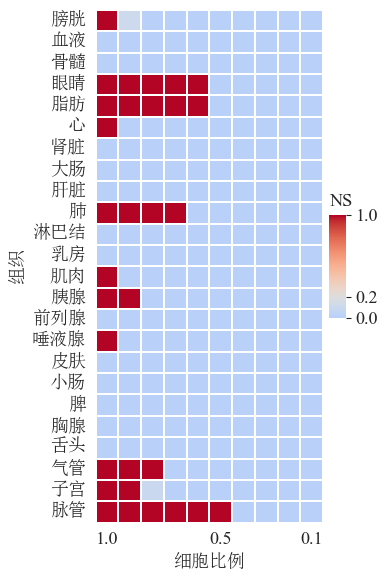

In [54]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

epsilon = 1e-10
result = pd.read_csv(r"E:\00_CeSOP\results\robust\cell percent\all.csv", index_col=0)
# result_log = -np.log10(result+epsilon)
result.columns = [f"{i}%" for i in range(10, 101, 10)]

## 使用组织的中文名称
names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
result.index = names["name"]

plt.rcParams['font.size'] = 13
plt.figure(figsize=(4, 6))  # 设置图形大小
# 翻转列顺序
df = result[result.columns[::-1]]

# 绘制热图
ax = sns.heatmap(
    df, 
    cmap='coolwarm', 
    linewidths=0.2, 
    center=0.2,
    cbar_kws={
        'shrink': 0.2, 
        'aspect': 6, 
        'ticks': [0, 0.2, 1], 
        'location': 'right',
        'pad': 0.02
    }
)

# 取列数
num_cols = len(df.columns)

# 设置 xticks 偏移 (注意每个都+0.5)
ax.set_xticks([0.5, int(num_cols / 2) + 0.5, num_cols - 0.5])  # 居中偏移
# 设置 X 轴标签 横向展示，只保留关键比例
# ax.set_xticks([0, int(len(df.columns)/2), len(df.columns)-1])  # 保留头、中、尾三个点
ax.set_xticklabels(['1.0', '0.5', '0.1'], rotation=0)  # 横向展示

# 设置 Y 轴标签
ax.set_yticklabels(df.index, rotation=0)

# 获取 colorbar 对象
cbar = ax.collections[0].colorbar

# 调整标签显示在上方
cbar.ax.yaxis.set_label_position('left') 
cbar.ax.yaxis.set_ticks_position('right')  # 设置 ticks 在上方

# 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
cbar.ax.set_ylabel("NS", rotation=0, labelpad=10)
cbar.ax.yaxis.set_label_coords(0.7, 1.05)  # 横向 1.4，纵向 1.02 (微调看效果)

# 设置图表标题和标签
ax.set_ylabel('组织')  # 纵轴标签
ax.set_xlabel('细胞比例')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\14-1.png", dpi=1000)
plt.show()

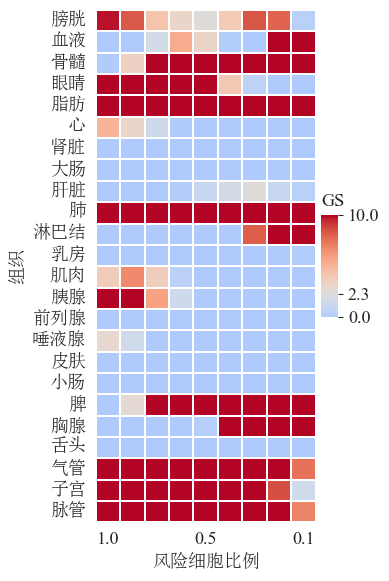

In [56]:
## 性状显著相关的组织or细胞类型数量
epsilon = 1e-10
trait = 29
core = "core"
fisher_df = pd.DataFrame()
for per in range(10,100,10):
    df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(per,trait,core))
    df["log fisher's pvalue"] = -np.log10(df["fisher's pvalue"] + epsilon)
    fisher_df = pd.concat([fisher_df,df["log fisher's pvalue"]],axis=1)
    
df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(10,trait,core))    
fisher_df.columns = [f"{i}%" for i in range(10, 100, 10)]
fisher_df.index = df["tissue"]## 使用组织的中文名称

names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
fisher_df.index=names["name"]

plt.figure(figsize=(4, 6))  # 设置图形大小
x = -np.log10(0.005 + epsilon)
plt.rcParams['font.size'] = 13
df= fisher_df

# 绘制热图
ax = sns.heatmap(
    df, 
    cmap='coolwarm', 
    linewidths=0.2, 
    center=x,
    cbar_kws={
        'shrink': 0.2, 
        'aspect': 6, 
        'ticks': [0, x, 10], 
        'location': 'right',
        'pad': 0.02
    }
)

# 取列数
num_cols = len(df.columns)
# 设置 xticks 偏移 (注意每个都+0.5)
ax.set_xticks([0.5, int(num_cols / 2) + 0.5, num_cols - 0.5])  # 居中偏移
# 设置 X 轴标签 横向展示，只保留关键比例
# ax.set_xticks([0, int(len(df.columns)/2), len(df.columns)-1])  # 保留头、中、尾三个点
ax.set_xticklabels(['1.0', '0.5', '0.1'], rotation=0)  # 横向展示
# 设置 Y 轴标签
ax.set_yticklabels(df.index, rotation=0)
# 获取 colorbar 对象
cbar = ax.collections[0].colorbar
# 调整标签显示在上方
cbar.ax.yaxis.set_label_position('left') 
cbar.ax.yaxis.set_ticks_position('right')  # 设置 ticks 在上方

# 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
cbar.ax.set_ylabel("GS", rotation=0, labelpad=10)
cbar.ax.yaxis.set_label_coords(0.7, 1.05)  # 横向 1.4，纵向 1.02 (微调看效果)

# 设置图表标题和标签
ax.set_ylabel('组织')  # 纵轴标签
ax.set_xlabel('风险细胞比例')  # 横轴标签
plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\15-1.png",dpi=1000)
plt.show()

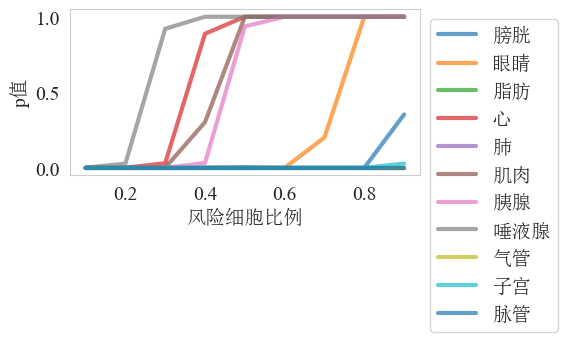

In [74]:
df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(10,trait,core),index_col=0) 
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(df[df["fisher's pvalue"] < 0.005]["tissue"])
fisher_df = pd.DataFrame()
#战置全局字体大小为12
plt.rcParams['font.size'] = 14
for per in range(10,100,10):
    df = pd.read_csv(r"E:\00_CeSOP\results\robust\topk\tissue\top%s_trait%s_%s_lcczscore.csv"%(per,trait,core))
    # 筛选 col1 列的值在 value_list 中的行
    filtered_df = df[df['tissue'].isin(filtered_list)]
    fisher_df = pd.concat([fisher_df,filtered_df["fisher's pvalue"]],axis=1)
fisher_df.index = filtered_list
# fisher_df.columns = [f"TOP{i}" for i in range(10, 100, 10)]
fisher_df.columns = [i*0.1 for i in range(1, 10)]
fisher_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']
ax = fisher_df.T.plot(linestyle='-', linewidth=3,alpha=0.7,ylabel="",xlabel = "风险细胞比例",figsize=(6, 3))
# 设置 y 轴标签
# ax.set_ylabel(r"$-\log_{10}$(p)")
ax.set_ylabel(r"p值")
# 显示图形
# 设置图例在图表外部
# 添加横线
# plt.axhline(y=0.005, color='red', linestyle='--')
# # 添加竖线
# plt.axvline(x=4, color='blue', linestyle='--')

plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\17-1.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

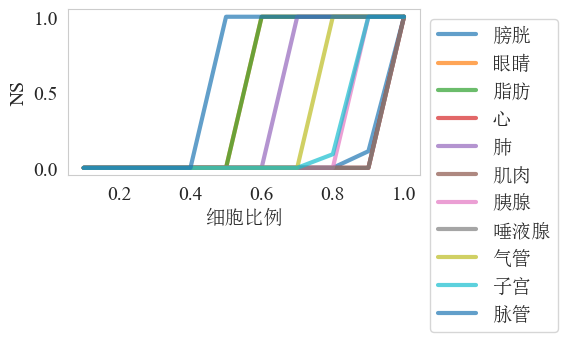

In [76]:
plt.show()
data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
# 筛选 col1 列值小于 0.005 的行
filtered_list = list(data[data["fisher's pvalue"] < 0.005]["tissue"])
result = pd.read_csv(r"E:\00_CeSOP\results\robust\cell percent\all.csv", index_col=0)
result_filtered_df = result[result.index.isin(filtered_list)]
result_filtered_df.columns = [i*0.1 for i in range(1, 11)]
result_filtered_df.index = ['膀胱', '眼睛', '脂肪', '心', '肺', '肌肉', '胰腺', '唾液腺', '气管', '子宫', '脉管']

#战置全局字体大小为12
plt.rcParams['font.size'] = 14
# plt.figure(figsize=(2, 1))
ax = result_filtered_df[result_filtered_df.columns[::-1]].T.plot(linestyle='-', linewidth=3, alpha=0.7, ylabel="NS",
                                                                 xlabel="细胞比例",figsize=(6, 3))
plt.grid(False)
# 显示图形
# 设置图例在图表外部
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig(r"E:\00_CeSOP\plot\figures-zh\16-1.png" ,bbox_inches='tight',dpi=1000 )
# plt.savefig(r"E:\00_CeSOP\plot\figures\16.png",dpi=1000)
plt.show()

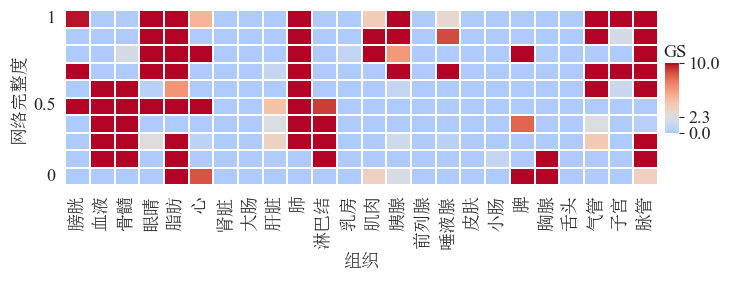

In [65]:
# '''网络完整性'''
# import math
# 
# result = pd.DataFrame()
# for percent in range(10,100,10):
#     results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent%s\tissue_top10_trait29_core_lcczscore.csv"%percent)   
#     result = pd.concat([result,results_ct["fisher's pvalue"]],axis=1)
# results_ct = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\percent90\tissue_top10_trait29_core_lcczscore.csv")    
# result.index = results_ct["tissue"]
# 
# data = pd.read_csv(r"E:\00_CeSOP\results\trait-cells-in-tissues-and-celltypes\tissues\29\top10_core_lcczscore.csv")
# data.index = data["tissue"]
# fisher_df_01 = pd.concat([result,data["fisher's pvalue"]],axis=1)   
# fisher_df_01.columns = [f"{i}%" for i in range(10, 101, 10)]
# 
# # 使用 seaborn 绘制热图
# import seaborn as sns
# epsilon = 1e-10
# result = pd.read_csv(r"E:\00_CeSOP\results\robust\network percent\all.csv",index_col=0)
# 
# result_log = -np.log10(fisher_df_01+epsilon)
# ## 使用组织的中文名称
# names = pd.read_excel(r"E:\00_CeSOP\results\tissues-names.xlsx")
# result_log.index=names["name"]
# 
# plt.rcParams['font.size'] = 13
# plt.figure(figsize=(8, 3))  # 设置图形大小
# x = -np.log10(0.005 + epsilon)
# df=result_log[result_log.columns[::-1]].T
# ax = sns.heatmap(df, cmap='coolwarm', linewidths = 0.05, 
#                 center = x,
#                  cbar_kws={'shrink': 0.4, 'aspect': 5, 'ticks': [0, x, 10], 'location': 'right',
#                            "pad": 0.01,
#                            'label':'GS'
#                            }
#                 )
# 
# # 设置 y 轴只显示 0, 0.5, 1
# # ax.set_xticks([0.5, int(num_cols / 2) + 0.5, num_cols - 0.5])  # 居中偏移
# ax.set_yticks([0.5, len(df.index)//2+0.5, len(df.index)-0.5])  # 映射为索引位置
# ax.set_yticklabels(['1', '0.5', '0'], rotation=0)
# 
# # **强制显示所有标签**
# # ax.set_xticks(np.arange(len(df.columns)) + 0.5)  # 设定 X 轴刻度
# # ax.set_yticks(np.arange(len(df.index)) + 0.5)   # 设定 Y 轴刻度
# # ax.set_xticklabels(df.columns, rotation=90)  # 旋转并对齐 X 轴标签
# # ax.set_yticklabels(df.index, rotation=0)    # 旋转 Y 轴标签
# 
# # 获取 colorbar 对象
# cbar = ax.collections[0].colorbar
# # 调整标签显示在上方
# cbar.ax.yaxis.set_label_position('right') 
# cbar.ax.yaxis.set_ticks_position('right')  # 设置 ticks 在上方
# 
# # 关键步骤！强制把标签移动到色条顶端 (1.05表示稍微在顶端外侧)
# cbar.ax.set_ylabel("GS", rotation=0, labelpad=10)
# cbar.ax.yaxis.set_label_coords(0.7, 1.25)  # 横向 1.4，纵向 1.02 (微调看效果)
# 
# 
# # 设置图表标题和标签
# ax.set_xlabel('组织')  # 纵轴标签
# ax.set_ylabel('网络完整度')  # 横轴标签
# plt.tight_layout()
# plt.savefig(r"E:\00_CeSOP\plot\figures-zh\13-2.png",dpi=1000)
# plt.show()
